# Diabetes Prediction Project

## Description of the dataset
1. **Pregnancies**: This column represents the number of times the individual has been pregnant (if applicable). It's a count variable indicating the gravidity of the individual.

2. **Glucose**: This column typically represents the plasma glucose concentration measured in a 2-hour oral glucose tolerance test. It's a crucial indicator for diagnosing diabetes and assessing blood sugar levels.

3. **BloodPressure**: This column represents the diastolic blood pressure (mm Hg) of the individual. Diastolic blood pressure is the pressure in the arteries when the heart rests between beats.

4. **SkinThickness**: This column represents the thickness of the skinfold measured at the triceps using a caliper (in mm). It's often used as a measure of body fat.

5. **Insulin**: This column represents the serum insulin level (mu U/ml) of the individual. Insulin is a hormone produced by the pancreas that regulates blood sugar levels.

6. **BMI (Body Mass Index)**: This column represents the Body Mass Index, which is a measure calculated using an individual's weight (in kg) divided by the square of their height (in meters). It's commonly used as an indicator of body fatness and correlates with the risk of developing obesity-related diseases, including type 2 diabetes.

7. **DiabetesPedigreeFunction**: This column represents a function that scores the likelihood of diabetes based on family history. It provides a measure of the genetic influence on diabetes.

8. **Age**: This column represents the age of the individual in years.

9. **Outcome**: This column typically represents whether an individual has diabetes or not. It's a binary variable where 1 often indicates the presence of diabetes and 0 indicates the absence.


## Importing necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Read the data file

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

**Summary of the dataset**

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Dimension of the dataset**

In [4]:
data.shape

(768, 9)

**Checking for missing values**

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*There is no missing values in are dataset*

We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [6]:
#here few misconception is there like BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

**Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it**

<Axes: >

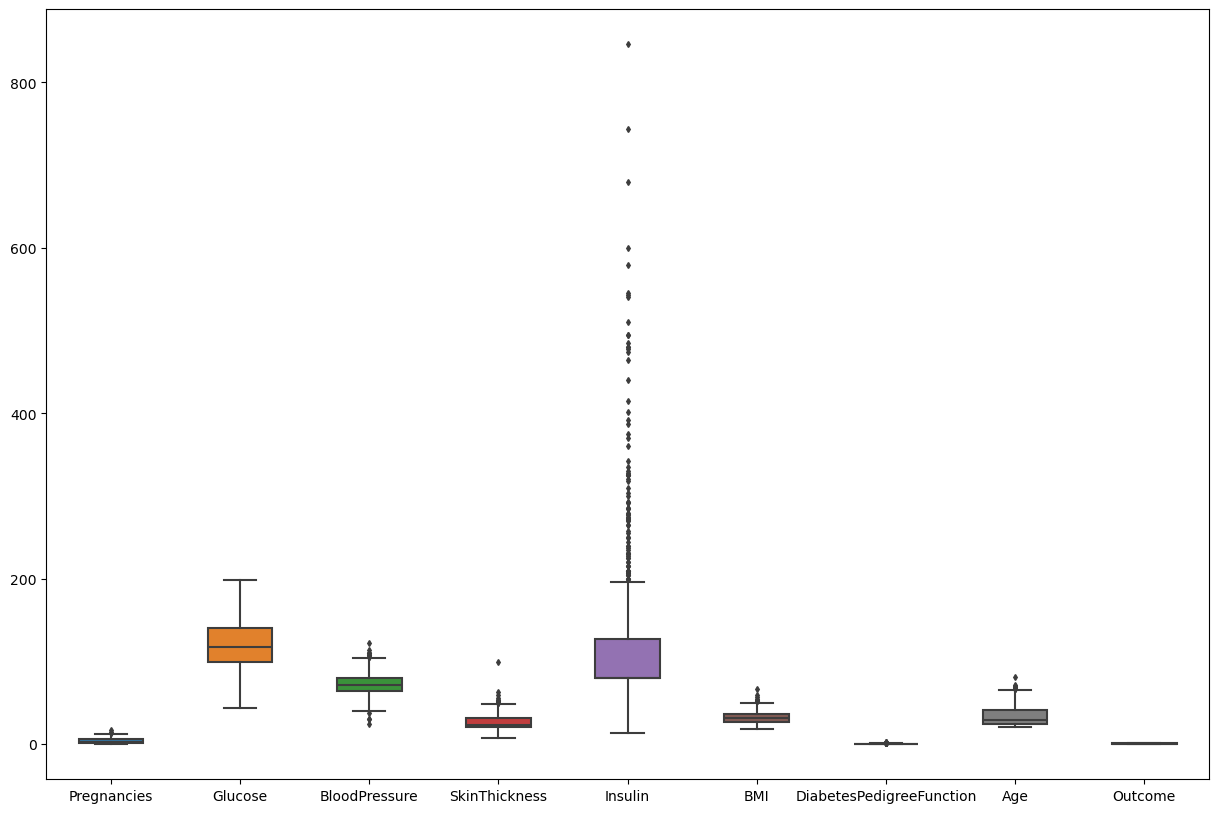

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

**The dataset exhibits the presence of outliers in the insulin variable, with a maximum value exceeding 800, while the overall range for insulin values predominantly lies between 0 and 200.**

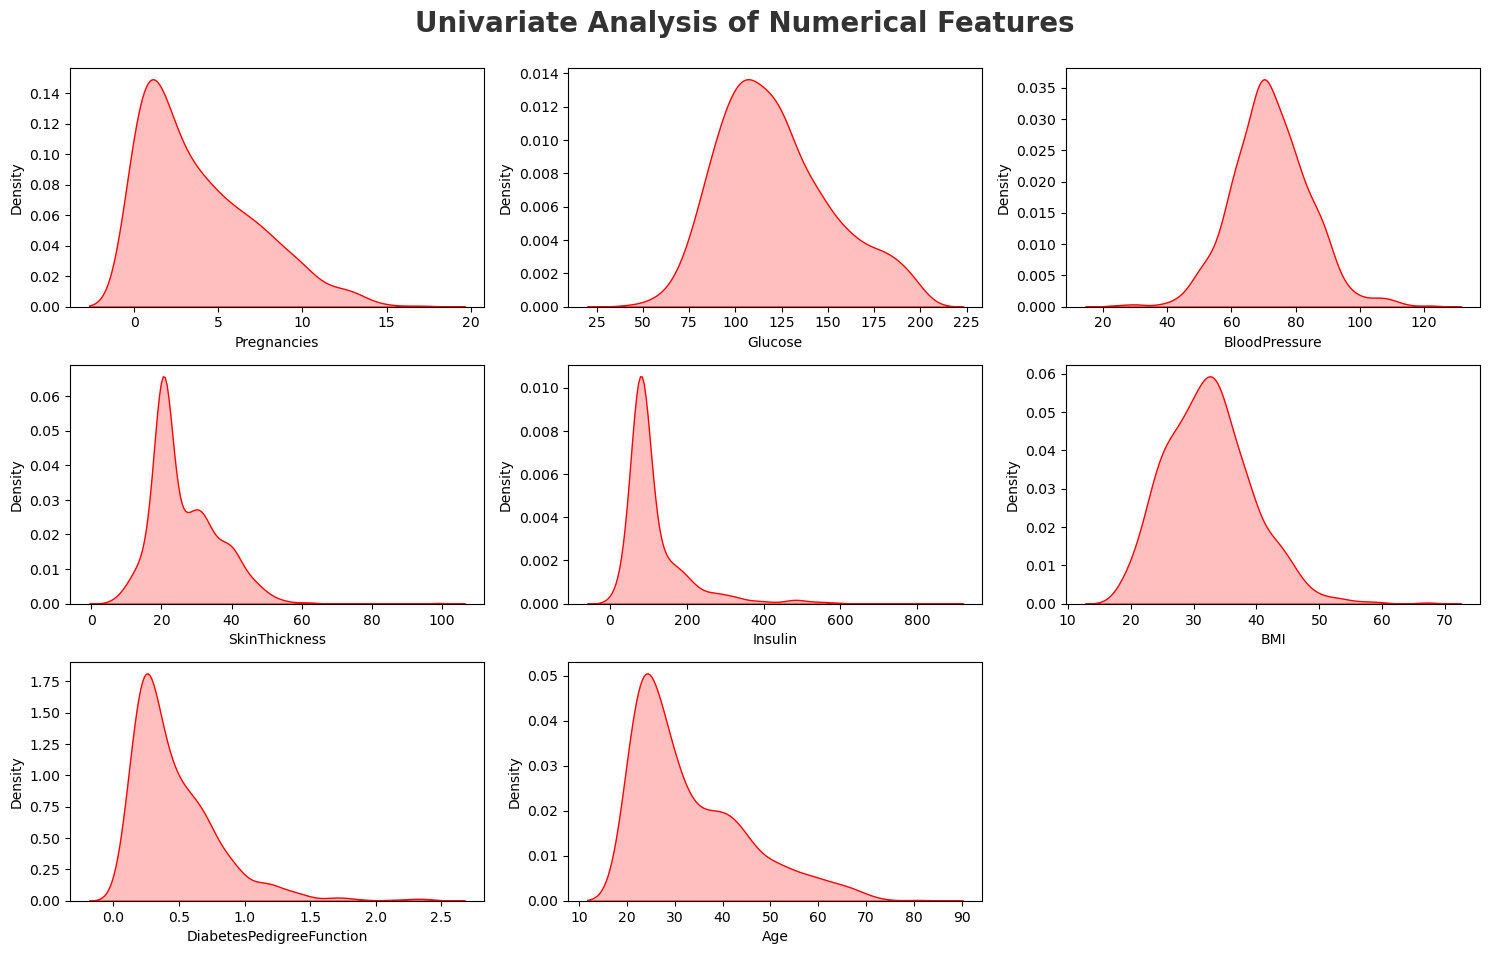

In [8]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Insight:**
The dataset demonstrates distinct distribution patterns among its variables. Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction, and Age show right-skewed distributions, indicating a concentration of lower values with a long tail on the right. Conversely, Glucose, BloodPressure, and BMI exhibit normal distributions, characterized by their bell-shaped curves and symmetry around the mean. 

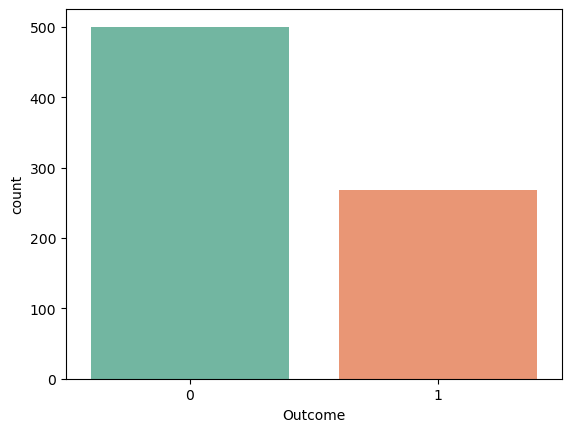

In [9]:
sns.countplot(x=data['Outcome'],palette="Set2")
plt.xlabel('Outcome')
plt.show()

 In this dataset, there are 500 non-diabetic cases compared to 280 diabetic cases. This imbalance can potentially affect the performance of machine learning models, as they may become biased towards the majority class (non-diabetic) and underperform in predicting the minority class (diabetic). 

**Handling Imbalanced dataset**

In [10]:
from imblearn.over_sampling import SMOTE
X = data.drop('Outcome', axis=1)
y = data['Outcome']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Outcome'] = y_resampled

print(df_resampled['Outcome'].value_counts())

Outcome
1    500
0    500
Name: count, dtype: int64


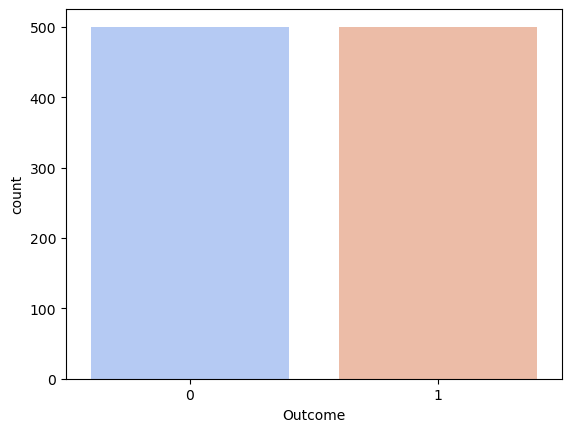

In [11]:
sns.countplot(x=df_resampled['Outcome'],palette="coolwarm")
plt.xlabel('Outcome')
plt.show()

In [12]:
df_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,79.799479,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,79.799479,26.600000,0.351000,31,0
2,8,183.000000,64.000000,20.536458,79.799479,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,5,164.421968,64.795118,20.536458,79.799479,31.906102,0.233595,39,1
996,6,115.875921,77.322218,32.768515,79.799479,30.160372,0.233544,27,1
997,4,171.532714,83.872721,27.212728,154.723633,33.300000,1.196333,51,1
998,8,111.623362,81.892389,32.699471,175.860887,34.173097,0.284266,35,1


In [13]:
df_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.082304,0.210313,0.009759,-0.008832,0.001765,-0.022922,0.541721,0.202945
Glucose,0.082304,1.000000,0.229777,0.167691,0.403120,0.252400,0.155249,0.258315,0.501272
BloodPressure,0.210313,0.229777,1.000000,0.132758,0.018434,0.280304,0.020602,0.339610,0.166888
SkinThickness,0.009759,0.167691,0.132758,1.000000,0.290316,0.537296,0.192192,0.014439,0.177104
Insulin,-0.008832,0.403120,0.018434,0.290316,1.000000,0.189454,0.160479,0.057194,0.184302
BMI,0.001765,0.252400,0.280304,0.537296,0.189454,1.000000,0.175837,0.028662,0.325327
DiabetesPedigreeFunction,-0.022922,0.155249,0.020602,0.192192,0.160479,0.175837,1.000000,0.034792,0.198174
Age,0.541721,0.258315,0.339610,0.014439,0.057194,0.028662,0.034792,1.000000,0.251050
Outcome,0.202945,0.501272,0.166888,0.177104,0.184302,0.325327,0.198174,0.251050,1.000000


**Insight:**
The dataset reveals a 0.53 correlation between BMI and SkinThickness, indicating a moderate positive relationship. Additionally, there is a 0.54 correlation between Age and Pregnancies, suggesting a similar moderate positive association between these variables.

<Axes: xlabel='Glucose', ylabel='Insulin'>

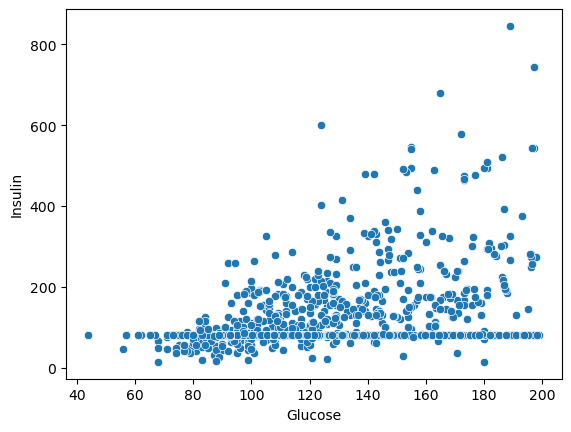

In [14]:
sns.scatterplot(df_resampled,x='Glucose',y='Insulin')

**Insight:**
The data demonstrates a predominantly positive correlation between glucose and insulin, indicating that insulin tends to increase as glucose levels rise. However, notable exceptions exist where glucose levels increase while insulin remains relatively constant around 100 units.

<Axes: xlabel='Outcome', ylabel='Glucose'>

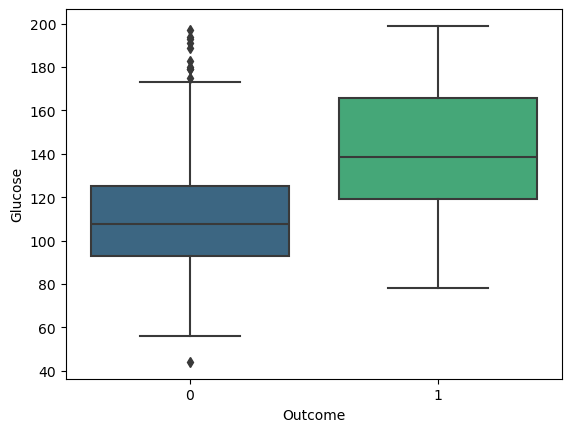

In [15]:
sns.boxplot(df_resampled,x='Outcome',y='Glucose',palette='viridis')

**Insights:**
Diabetic individuals commonly present with glucose levels ranging from 80 to 200 mg/dL, which contrasts with the narrower range observed in non-diabetic individuals. 

<Axes: xlabel='Outcome', ylabel='Insulin'>

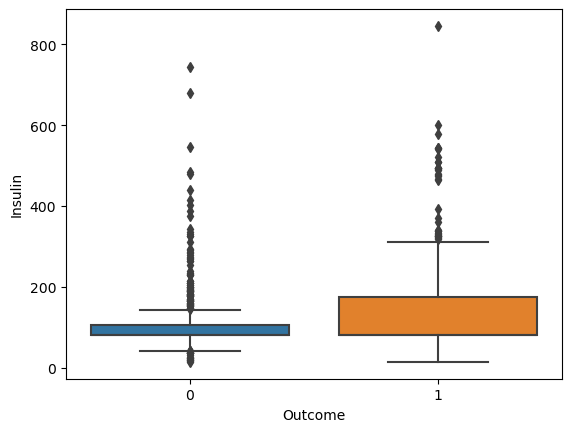

In [16]:
sns.boxplot(df_resampled,x='Outcome',y='Insulin')

**The presence of outliers in the insulin variable can offer valuable insights into the heterogeneity of diabetes**

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

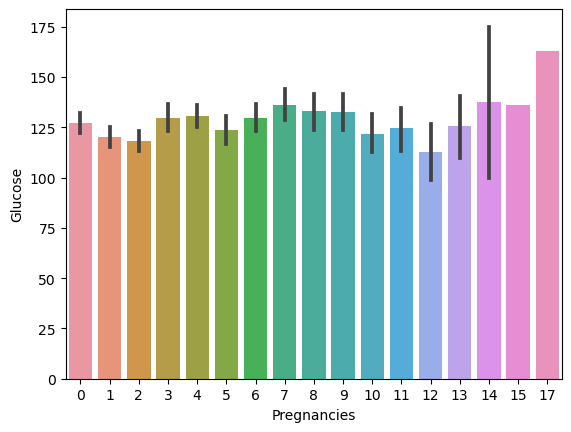

In [17]:
sns.barplot(df_resampled,x='Pregnancies',y='Glucose')

**It suggest that the person with max pergnancies has max glucose level**


<Axes: xlabel='Outcome', ylabel='BMI'>

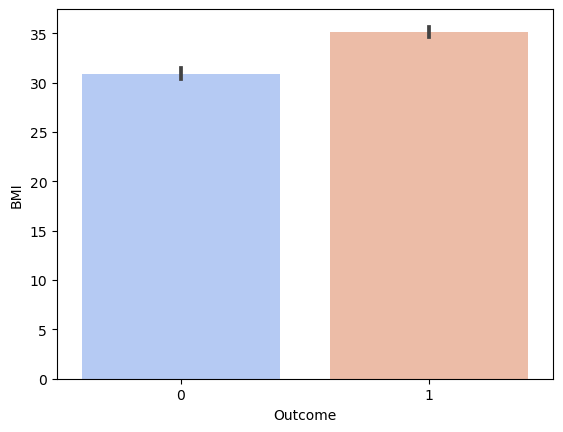

In [18]:
sns.barplot(df_resampled,x='Outcome',y='BMI',palette='coolwarm')

**Individuals with diabetes often exhibit elevated body mass index (BMI), with maximum values reaching up to 35 or higher.**

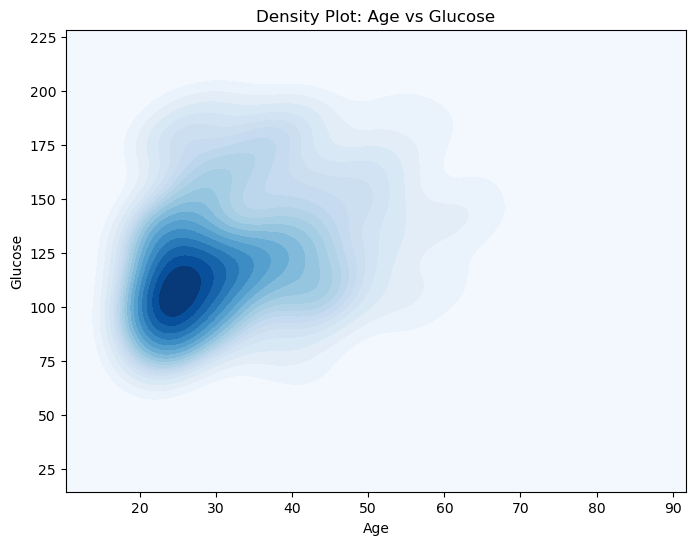

In [19]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_resampled, x='Age', y='Glucose', cmap="Blues", shade=True, thresh=0, levels=20)
plt.title('Density Plot: Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

**Insight:**
Within the 20 to 30 age range, most individuals maintain fasting blood glucose levels between 80 and 130 mg/dL. However, some may exceed 200 mg/dL, which merits attention and further assessment due to potential health implications.

In [20]:
df_resampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


**Segregate the dependent and independent variable**

In [21]:
X = df_resampled.drop(columns = ['Outcome'])
y = df_resampled['Outcome']

**Separate dataset into train and test**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((750, 8), (250, 8))

## Feature Scaling

In [23]:
import pickle
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [24]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [25]:
X_train_scaled

array([[-1.20569107, -1.3141413 , -0.41161843, ...,  0.40159059,
        -0.75381073, -0.80662089],
       [ 1.85030185, -0.51064573, -0.24745678, ..., -0.85444453,
        -1.03860035,  0.5133042 ],
       [-0.59449249, -0.54278556,  0.08086652, ..., -0.11292982,
         0.59673795, -0.63063088],
       ...,
       [ 0.01670609, -1.05702272, -0.6578609 , ..., -1.27816722,
        -1.01804852, -1.15860091],
       [ 2.15590114, -1.34628113,  0.08086652, ..., -0.46098774,
        -0.57178026,  0.07332917],
       [ 0.32230539,  0.29284984,  0.73751312, ..., -0.17458478,
         0.42645138,  3.06515938]])

## Model Building

In [26]:
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Models to evaluate
models = {
    'log_reg' : LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)   
}

# Define hyperparameters for each model
params = {
    'log_reg':{
        'penalty' : ['l1','l2'], 
        'C'       : np.logspace(-3,3,7),
        'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
},
    'Decision Tree': {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
   
    }
}


## Model Evaluation

In [27]:
# Perform hyperparameter tuning and evaluation for each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=params[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    
    # Print the best parameters found by GridSearchCV
    print(f"Best parameters found by GridSearchCV for {model_name}:")
    print(grid_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on the test set for {model_name}: {accuracy:.4f}")
    
    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("="*50)


Training log_reg...
Best parameters found by GridSearchCV for log_reg:
{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy on the test set for log_reg: 0.7720
Classification Report for log_reg:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       126
           1       0.79      0.74      0.76       124

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250

Training Decision Tree...
Best parameters found by GridSearchCV for Decision Tree:
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy on the test set for Decision Tree: 0.7960
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       126
           1       0.82      0.75      0.78       124

    accuracy                           0.80    

## Best model

In [28]:
model =RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)   
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.884

## Pickling of the model

In [29]:
import pickle
file = open('modelForPrediction.pkl','wb')
pickle.dump(model,file)
file.close()